(mean(A), var(A)) = (1.0, 1.0073278590974388)


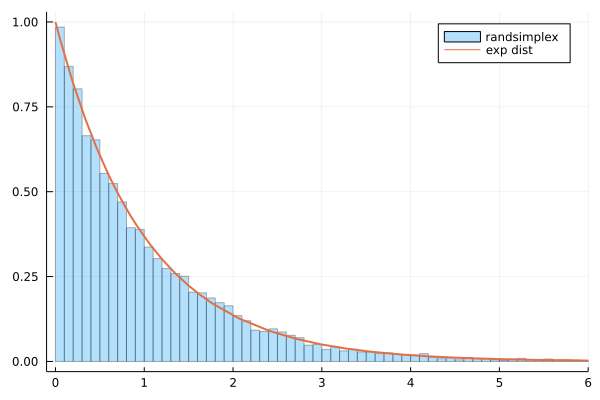

In [1]:
using Random, Statistics, Plots

function diff!(X)
    @inbounds for i in reverse(keys(X)[begin:end-1])
        X[i+1] -= X[i]
    end
    X
end

function randsimplex!(rng::AbstractRNG, X)
    X[end] = one(eltype(X))
    Y = @view X[begin:end-1]
    rand!(rng, Y)
    sort!(Y)
    X .*= length(X)
    diff!(X)
end
randsimplex(rng::AbstractRNG, N, T=Float64) = randsimplex!(rng, Vector{T}(undef, N))
randsimplex!(X) = randsimplex!(Random.default_rng(), X)
randsimplex(N, T=Float64) = randsimplex!(Vector{T}(undef, N))

n = 10^4
A = randsimplex(n)
@show mean(A), var(A)
histogram(A; norm=true, alpha=0.3, label="randsimplex")
plot!(x->exp(-x), 0, 6; xlim=(-0.1, 6), lw=2, label="exp dist")

In [2]:
struct Simplex{T} N::Int end
Simplex(N) = Simplex{Float64}(N)

function Random.rand!(rng::AbstractRNG,
        X::AbstractVector{T}, d::Random.SamplerTrivial{Simplex{T}}) where T
    @assert length(X) == d[].N
    randsimplex!(rng, X)
end
Base.rand(rng::AbstractRNG, d::Random.SamplerTrivial{Simplex{T}}) where T =
    rand!(rng, Vector{T}(undef, d[].N), d)

In [3]:
using BenchmarkTools

X = zeros(10)
d = Simplex(10)
@btime rand!($X, $d)

  131.235 ns (0 allocations: 0 bytes)


10-element Vector{Float64}:
 0.49565828584584803
 0.20521690829026995
 0.08344356042827794
 1.030759402415815
 0.9454264418337954
 1.651784905384912
 2.0542053819674146
 0.3412016602051793
 3.1358112662381776
 0.05649218739030992

In [4]:
rand(Simplex(10))

10-element Vector{Float64}:
 0.5938158063449717
 0.7122970990327504
 2.9391748527336796
 0.38012907737634105
 1.0675156434906805
 0.4830630955043107
 0.5235275286858823
 0.7259642451434623
 2.3300753866818393
 0.24443726500608243